In [1]:

import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import pandas as pd
import numpy as np
import os

In [2]:
%%capture

%pip install seaborn matplotlib pandas

### Data ingestion, PDA


In [3]:
url="https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/home_loan_train.csv"

df= pd.read_csv(url)
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [4]:
df2=df.copy()
df2.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
df2.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
number_figs= df2.select_dtypes(include=['float64', 'int64']).columns
number_figs

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [7]:
df2[number_figs].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df2.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
df2.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### Data Cleaning

In [10]:
df2.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
df2.duplicated().sum()

np.int64(0)

In [13]:
df2['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [18]:
df2['Gender'].fillna(df2['Gender'].mode()[0], inplace= True)

In [14]:
df2.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [25]:
df2.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### let's fill for Others too, Married column, dependents etc

In [19]:
df2['Married'].isna().sum()

np.int64(3)

In [28]:
df2.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [33]:
object_columns = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Property_Area']
numerical_columns = ['LoanAmount', 'Loan_Amount_Term']

In [22]:
for col in object_columns:
    df2[col].fillna(df2[col].mode()[0], inplace= True)

C:\Users\Adenuga Pelumi\AppData\Local\Temp\ipykernel_35944\3286945013.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2[col].fillna(df2[col].mode()[0], inplace= True)


In [27]:
for col in numerical_columns:
    df2[col].fillna(df2[col].median(), inplace = True)

C:\Users\Adenuga Pelumi\AppData\Local\Temp\ipykernel_35944\3761262007.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2[col].fillna(df2[col].median(), inplace = True)
C:\Users\Adenuga Pelumi\AppData\Local\Temp\ipykernel_35944\3761262007.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [36]:
needed= [ 'Gender', 'Married', 'Property_Area']

for col in needed:
    if col in needed:
        df2[col]= df2[col].str.strip()

In [41]:
for c in df2.select_dtypes('object').columns:
    df2[c] = df2[c].astype(str).str.strip().replace({'nan': np.nan})

In [43]:
for c in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']:
    if c in df2.columns:
        df2[c] = pd.to_numeric(df2[c], errors = 'coerce')

In [45]:
df2.head(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [35]:
df2.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### EDA


In [59]:
# Checking for Outliers for applicant income

Q1 = df2['ApplicantIncome'].quantile(0.25)
Q2 = df2['ApplicantIncome'].quantile(0.50)
Q3 = df2['ApplicantIncome'].quantile(0.75)
print("Q1:",Q1)
print("\nQ2:",Q2)
print("\nQ3:",Q3)
IQR = Q3 - Q1
print("IQR:",IQR)

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
print("lower bound :",lower_bound)
print("\nUpper bound :",upper_bound)
mask_outliers = (df2['ApplicantIncome'] > upper_bound) | (df2['ApplicantIncome'] < lower_bound).sum()
print("Total Numbers of outlier is", mask_outliers.sum())


Q1: 2877.5

Q2: 3812.5

Q3: 5795.0
IQR: 2917.5
lower bound : -1498.75

Upper bound : 10171.25
Total Numbers of outlier is 50


In [61]:
#  Checking for Outliers for loan Amount

Q1 = df2['LoanAmount'].quantile(0.25)
Q2 = df2['LoanAmount'].quantile(0.50)
Q3 = df2['LoanAmount'].quantile(0.75)
print("Q1:",Q1)
print("\nQ2:",Q2)
print("\nQ3:",Q3)
IQR = Q3 - Q1
print("IQR:",IQR)

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

print("lower bound :",lower_bound)
print("\nUpper bound :",upper_bound)
mask_outliers = (df2['LoanAmount'] > upper_bound) | (df2['LoanAmount'] < lower_bound).sum()
print("Total Number of Outlier is", mask_outliers.sum())


Q1: 100.25

Q2: 125.0

Q3: 164.75
IQR: 64.5
lower bound : 3.5

Upper bound : 261.5
Total Number of Outlier is 41


In [62]:
Q1 = df2['CoapplicantIncome'].quantile(0.25)
Q2 = df2['CoapplicantIncome'].quantile(0.50)
Q3 = df2['CoapplicantIncome'].quantile(0.75)
print("Q1:",Q1)
print("\nQ2:",Q2)
print("\nQ3:",Q3)
IQR = Q3 - Q1
print("IQR:",IQR)

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

print("lower bound :",lower_bound)
print("\nUpper bound :",upper_bound)
mask_outliers = (df2['CoapplicantIncome'] > upper_bound) | (df2['CoapplicantIncome'] < lower_bound).sum()
print("Total Number of Outlier is", mask_outliers.sum())


Q1: 0.0

Q2: 1188.5

Q3: 2297.25
IQR: 2297.25
lower bound : -3445.875

Upper bound : 5743.125
Total Number of Outlier is 18


In [63]:
df3=df2.copy()

In [64]:
outlier_col=['ApplicantIncome','LoanAmount','CoapplicantIncome']

In [66]:
def clean_outliers(data, i):
    q1 = df3[i].quantile(0.25)
    q3 = df3[i].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    data.loc[:, i] = np.where((data.loc[:, i] < lower) | (data.loc[:, i] > upper), 
                       data[i].clip(lower = lower, upper = upper).astype(data[i].dtype), data[i])
    return data

for i in outlier_col:
    df3= clean_outliers(df3, i)



In [67]:
### After Ouliers sorted
df3.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Apllicant_clip
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4583.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,2583.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


In [72]:
df3.drop(['Apllicant_clip'], axis=1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [73]:
df2.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Apllicant_clip
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4583.0


In [79]:
import seaborn as sns
import matplotlib.pyplot as plt


def outlier_vis (oulier_col):
    for x in outlier_col:       
        plt.figure(figsize=(8,4))
        sns.boxplot(x=df2[x])
        plt.axvline(lower_bound, color='red', linestyle='--', label='lower bound')
        plt.axvline(upper_bound, color='red', linestyle='--', label='upper bound')
        plt.legend()
        plt.title(f'{x} boxplot with IQR bounds')
        plt.show()

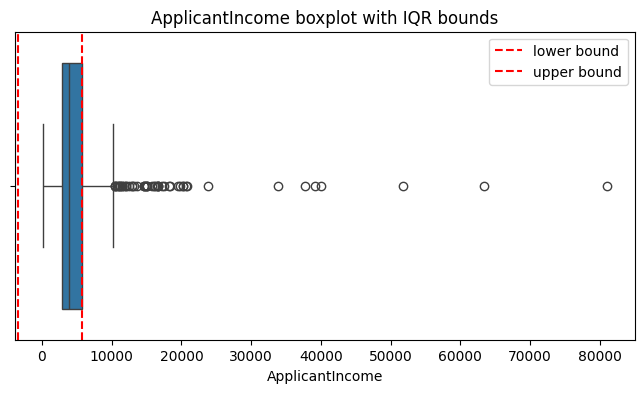

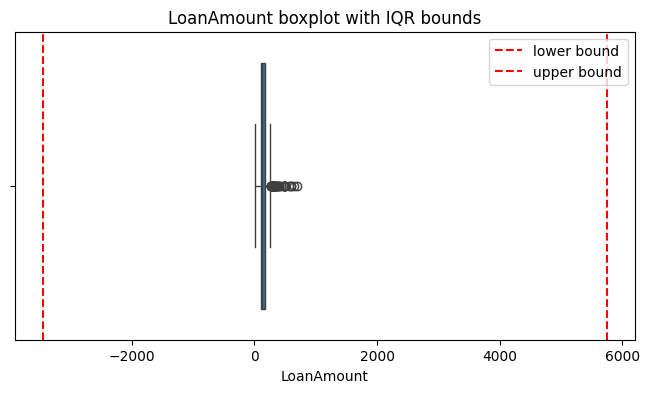

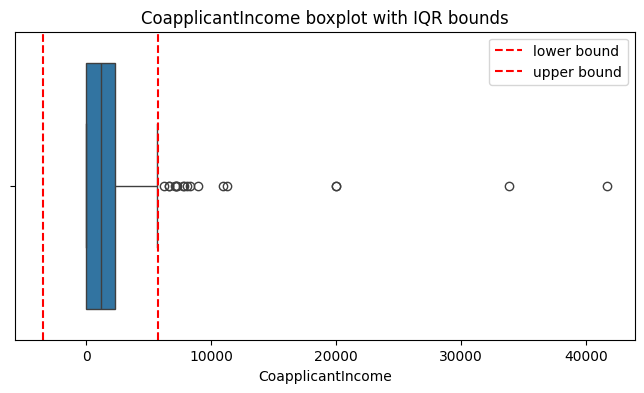

In [80]:
outlier_vis(outlier_col)

## Alternative methods to check for outliers


In [53]:
mask_outliers = (df2['ApplicantIncome'] > upper_bound) | (df2['ApplicantIncome'] < lower_bound).sum()
mask_outliers.sum()
# # Rows that are outliers
# outliers_df = df2[mask_outliers].copy()

# # Summary
# n_outliers = outliers_df.shape[0]
# n_total = df2.shape[0]
# print(f"Outliers found: {n_outliers} / {n_total} ({n_outliers / n_total * 100:.2f}%)")
# outliers_df.head(10)   # show first 10 outlier rows

np.int64(50)

In [ ]:
for c in df2.select_dtypes('object').columns:
    df2[c] = df2[c].astype(str).str.strip().replace({'nan': np.nan})

In [54]:
df2.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loan_ID,614,614,LP001002,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,614,2,Male,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,614,2,Yes,401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,614,4,0,360,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,614,2,Graduate,480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,614,2,No,532,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,614.0,NaN,NaN,NaN,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.0,81000.0
CoapplicantIncome,614.0,NaN,NaN,NaN,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,614.0,NaN,NaN,NaN,145.465798,84.180967,9.0,100.25,125.0,164.75,700.0
Loan_Amount_Term,614.0,NaN,NaN,NaN,342.410423,64.428629,12.0,360.0,360.0,360.0,480.0


In [56]:
df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Apllicant_clip
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4583.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,2583.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


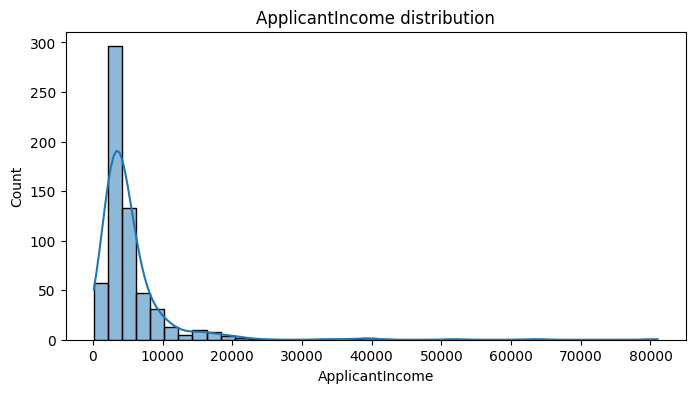

In [57]:
plt.figure(figsize=(8,4))
sns.histplot(df2['ApplicantIncome'].dropna(), bins=40, kde=True)
plt.title('ApplicantIncome distribution')
plt.show()

C:\Users\Adenuga Pelumi\AppData\Local\Temp\ipykernel_35944\4001044281.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='pastel')


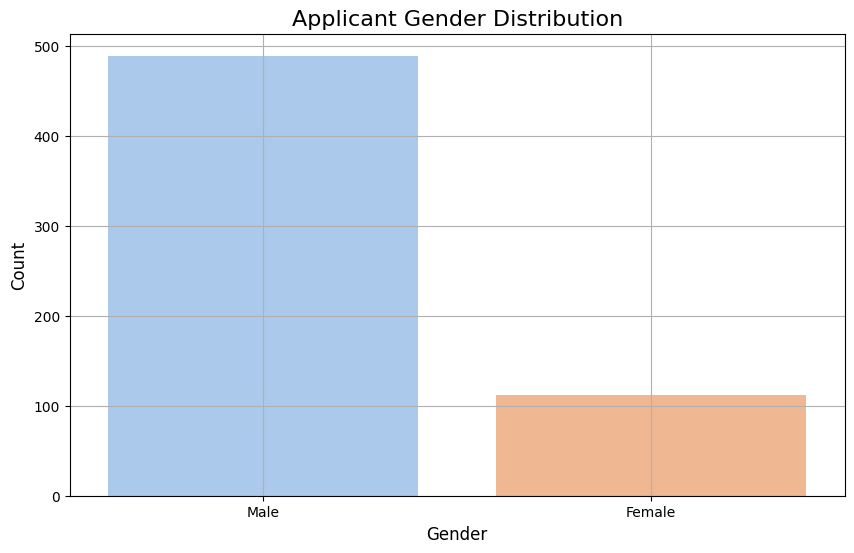

In [58]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender', palette='pastel')
plt.title('Applicant Gender Distribution', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True)
plt.show()